In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

,name,type,variable,value,year,crime_type
90,"New York, New York",place,rate,329.552930,2006,Aggravated assault
154,"New York, New York",place,rate,13.116961,2006,Forcible rape
160,"New York, New York",place,rate,7.299448,2006,Murder and nonnegligent manslaughter
163,"New York, New York",place,rate,332.048044,2007,Aggravated assault
238,"New York, New York",place,rate,6.033919,2007,Murder and nonnegligent manslaughter
96,"New York, New York",place,rate,10.644515,2007,Forcible rape
139,"New York, New York",place,rate,6.267170,2008,Murder and nonnegligent manslaughter
0,"New York, New York",place,rate,10.664973,2008,Forcible rape
48,"New York, New York",place,rate,297.552748,2008,Aggravated assault
39,"New York, New York",place,rate,5.606537,2009,Murder and nonnegligent manslaughter


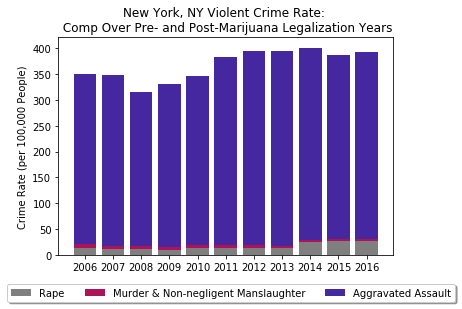

In [3]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

file_to_load1 = os.path.join("Output CSVs", "NYcrime.csv")

# load your city's CSV in a dataframe
NYcrimeDF = pd.read_csv(file_to_load1)

# filter whole NY dataset to just showing rates, not counts:
NYcrimeRates = NYcrimeDF.loc[NYcrimeDF["variable"] == "rate"]

# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
NYcrimeRatesYears = NYcrimeRates.loc[NYcrimeRates["year"].isin(years)]
NYcrimeRatesYears = NYcrimeRatesYears.drop_duplicates()
# remove extraneous columns
NYcrimeRatesYears = NYcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
NYcrimeRatesYears = NYcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)"]
NYcrimeRatesViolent = NYcrimeRatesYears.loc[NYcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
NYrape = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
NYrape = NYrape.set_index(["year"])

NYmurder = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
NYmurder = NYmurder.set_index(["year"])

NYassault = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Aggravated assault"]
NYassault = NYassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYrape.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(NY_x_axis, NYmurder["value"].values, color='#AD1457', bottom=NYrape["value"].values)
p3 = plt.bar(NY_x_axis, NYassault["value"].values, color='#4527A0', bottom=(NYmurder["value"] + NYrape["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
NYcrimeRatesViolent

,name,type,variable,value,year,crime_type
101,"New York, New York",place,rate,271.120604,2006,Burglary
136,"New York, New York",place,rate,1412.896336,2006,Larceny
64,"New York, New York",place,rate,287.948526,2006,Robbery
113,"New York, New York",place,rate,195.174501,2006,Motor vehicle theft
38,"New York, New York",place,rate,1879.191442,2006,Property crime
75,"New York, New York",place,rate,265.042342,2007,Robbery
120,"New York, New York",place,rate,1402.861927,2007,Larceny
43,"New York, New York",place,rate,1818.545446,2007,Property crime
2,"New York, New York",place,rate,161.261362,2007,Motor vehicle theft
165,"New York, New York",place,rate,254.422157,2007,Burglary


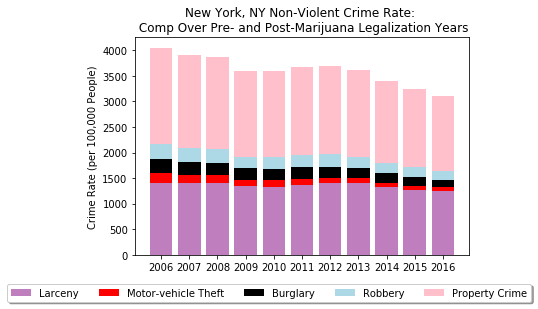

In [4]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
NYcrimeRatesNonViolent = NYcrimeRates.loc[NYcrimeRates["crime_type"].isin(nonVcrime)]
NYcrimeRatesNonViolent = NYcrimeRatesNonViolent.drop_duplicates()
NYcrimeRatesNonViolentYears = NYcrimeRatesNonViolent.loc[NYcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
NYcrimeRatesNVComparison = NYcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
NYcrimeRatesNVComparison = NYcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
NYlarceny = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
NYlarceny = NYlarceny.set_index(["year"])

NYmotor = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
NYmotor = NYmotor.set_index(["year"])

NYburglary = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Burglary"]
NYburglary = NYburglary.set_index(["year"])

NYrobbery = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Robbery"]
NYrobbery = NYrobbery.set_index(["year"])

NYpropCrime = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Property crime"]
NYpropCrime = NYpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYlarceny.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(NY_x_axis, NYmotor["value"].values, color='red', bottom=NYlarceny["value"].values)
p3 = plt.bar(NY_x_axis, NYburglary["value"].values, color='black', bottom=(NYmotor["value"] + NYlarceny["value"]).values)
p4 = plt.bar(NY_x_axis, NYrobbery["value"].values, color="#ADD8E6", bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"]).values)
p5 = plt.bar(NY_x_axis, NYpropCrime["value"].values, color='pink', bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"] + NYrobbery["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
NYcrimeRatesNVComparison

In [5]:
# created a series object with all-together sums of non-violent crime for NY, in case it's needed:
NYcrimeRatesNVComparison_gb = NYcrimeRatesNVComparison.groupby("year")
summedNV_NYcrime = NYcrimeRatesNVComparison_gb["value"].sum()
summedNV_NYcrime

year
2006    4046.331409
2007    3902.133234
2008    3860.528515
2009    3601.956312
2010    3584.907969
2011    3661.611994
2012    3688.088967
2013    3610.141153
2014    3399.541039
2015    3235.533825
2016    3106.134915
Name: value, dtype: float64

,name,type,variable,value,year,crime_type
157,"Colorado Springs, Colorado",place,rate,569.256941,2006,Violent crime
63,"Colorado Springs, Colorado",place,rate,530.589770,2007,Violent crime
162,"Colorado Springs, Colorado",place,rate,528.272767,2008,Violent crime
126,"Colorado Springs, Colorado",place,rate,490.008117,2009,Violent crime
54,"Colorado Springs, Colorado",place,rate,491.849424,2010,Violent crime
59,"Colorado Springs, Colorado",place,rate,440.190710,2011,Violent crime
164,"Colorado Springs, Colorado",place,rate,455.253107,2012,Violent crime
6,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
62,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
249,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime


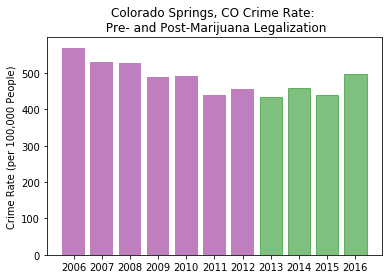

In [6]:
# basic violent crime CO dataset exploration
file_to_load2 = os.path.join("Output CSVs", "COcrime.csv")

COcrimeDF = pd.read_csv(file_to_load2)

COcrimeRates = COcrimeDF.loc[COcrimeDF["variable"] == "rate"]

COcrimeRatesViolent = COcrimeRates.loc[COcrimeRates["crime_type"] == "Violent crime"]
COcrimeRatesViolent = COcrimeRatesViolent.drop_duplicates()
COcrimeRatesViolentYears = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]

COcrimePostLegalization = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]
COcrimePostLegalization = COcrimePostLegalization.drop(columns=["key", "id", "place_name"])
COcrimePostLegalization = COcrimePostLegalization.sort_values(['year'], ascending=[True])
COcrimePostLegalization

CO_x_axis = np.arange(len(COcrimePostLegalization["value"]))
postLegalCO = plt.bar(CO_x_axis, COcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCO[7].set_color('g')
postLegalCO[8].set_color('g')
postLegalCO[9].set_color('g')
postLegalCO[10].set_color('g')

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
COcrimePostLegalization

Weed legalized in CA and OR all of 2017 and 2018. Weed legalized in CO all of 2013 onwards.

Bar graphs clustered by city showing one bar per year in ascending order, bar height reflecting rate per 100,000ppl.


,name,type,variable,value,year,crime_type
14,"Colorado Springs, Colorado",place,rate,66.612351,2006,Forcible rape
49,"Colorado Springs, Colorado",place,rate,336.246407,2006,Aggravated assault
261,"Colorado Springs, Colorado",place,rate,3.980818,2006,Murder and nonnegligent manslaughter
158,"Colorado Springs, Colorado",place,rate,306.058079,2007,Aggravated assault
260,"Colorado Springs, Colorado",place,rate,7.217090,2007,Murder and nonnegligent manslaughter
33,"Colorado Springs, Colorado",place,rate,76.180395,2007,Forcible rape
262,"Colorado Springs, Colorado",place,rate,6.342444,2008,Murder and nonnegligent manslaughter
3,"Colorado Springs, Colorado",place,rate,88.529954,2008,Forcible rape
150,"Colorado Springs, Colorado",place,rate,296.509277,2008,Aggravated assault
44,"Colorado Springs, Colorado",place,rate,3.734818,2009,Murder and nonnegligent manslaughter


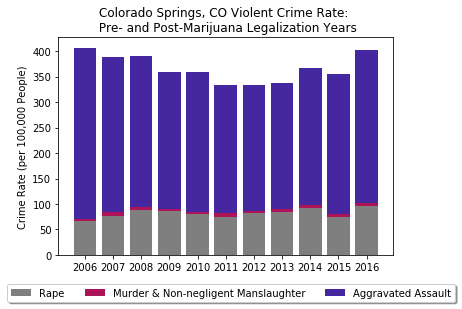

In [7]:
COcrimeRates
# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
COcrimeRatesYears = COcrimeRates.loc[COcrimeRates["year"].isin(years)]
COcrimeRatesYears = COcrimeRatesYears.drop_duplicates()
# remove extraneous columns
COcrimeRatesYears = COcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
COcrimeRatesYears = COcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", 'Rape (legacy definition)']
COcrimeRatesViolent = COcrimeRatesYears.loc[COcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
COrape = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
COrape = COrape.set_index(["year"])

COmurder = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
COmurder = COmurder.set_index(["year"])

COassault = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"] == "Aggravated assault"]
COassault = COassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COrape.index
# each bar is a line here
p1 = plt.bar(CO_x_axis, COrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(CO_x_axis, COmurder["value"].values, color='#AD1457', bottom=COrape["value"].values)
p3 = plt.bar(CO_x_axis, COassault["value"].values, color='#4527A0', bottom=(COmurder["value"] + COrape["value"]).values)

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
COcrimeRatesViolent

,name,type,variable,value,year,crime_type
14,"Colorado Springs, Colorado",place,rate,66.612351,2006,Forcible rape
49,"Colorado Springs, Colorado",place,rate,336.246407,2006,Aggravated assault
261,"Colorado Springs, Colorado",place,rate,3.980818,2006,Murder and nonnegligent manslaughter
158,"Colorado Springs, Colorado",place,rate,306.058079,2007,Aggravated assault
260,"Colorado Springs, Colorado",place,rate,7.217090,2007,Murder and nonnegligent manslaughter
33,"Colorado Springs, Colorado",place,rate,76.180395,2007,Forcible rape
262,"Colorado Springs, Colorado",place,rate,6.342444,2008,Murder and nonnegligent manslaughter
3,"Colorado Springs, Colorado",place,rate,88.529954,2008,Forcible rape
150,"Colorado Springs, Colorado",place,rate,296.509277,2008,Aggravated assault
44,"Colorado Springs, Colorado",place,rate,3.734818,2009,Murder and nonnegligent manslaughter


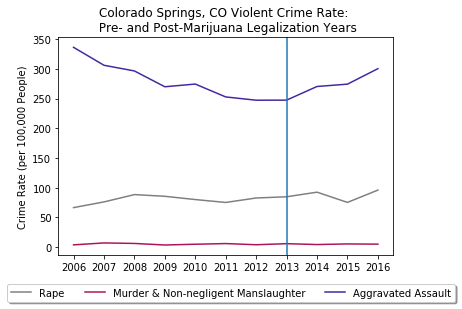

In [8]:
# Create stacked line graphs where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COrape.index
# each bar is a line here
p1 = plt.plot(CO_x_axis, COrape["value"], color='black', alpha=0.5)
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.plot(CO_x_axis, COmurder["value"].values, color='#AD1457')
p3 = plt.plot(CO_x_axis, COassault["value"].values, color='#4527A0')

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
plt.axvline(x=2013)
COcrimeRatesViolent

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,4797.150796,2006,Property crime
170,"Colorado Springs, Colorado",place,rate,474.778866,2006,Motor vehicle theft
67,"Colorado Springs, Colorado",place,rate,162.417365,2006,Robbery
24,"Colorado Springs, Colorado",place,rate,888.253138,2006,Burglary
148,"Colorado Springs, Colorado",place,rate,3434.118793,2006,Larceny
178,"Colorado Springs, Colorado",place,rate,397.474553,2007,Motor vehicle theft
111,"Colorado Springs, Colorado",place,rate,3177.658028,2007,Larceny
72,"Colorado Springs, Colorado",place,rate,141.134206,2007,Robbery
99,"Colorado Springs, Colorado",place,rate,4424.878111,2007,Property crime
77,"Colorado Springs, Colorado",place,rate,849.745531,2007,Burglary


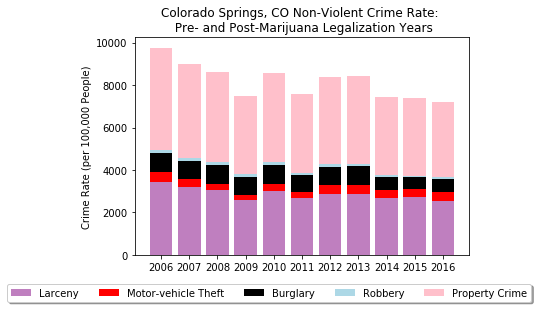

In [9]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
COcrimeRatesNonViolent = COcrimeRates.loc[COcrimeRates["crime_type"].isin(nonVcrime)]
COcrimeRatesNonViolent = COcrimeRatesNonViolent.drop_duplicates()
COcrimeRatesNonViolentYears = COcrimeRatesNonViolent.loc[COcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
COcrimeRatesNVComparison = COcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
COcrimeRatesNVComparison = COcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
COlarceny = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
COlarceny = COlarceny.set_index(["year"])

COmotor = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
COmotor = COmotor.set_index(["year"])

COburglary = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Burglary"]
COburglary = COburglary.set_index(["year"])

COrobbery = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Robbery"]
COrobbery = COrobbery.set_index(["year"])

COpropCrime = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Property crime"]
COpropCrime = COpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COlarceny.index
# each bar is a line here
p1 = plt.bar(CO_x_axis, COlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(CO_x_axis, COmotor["value"].values, color='red', bottom=COlarceny["value"].values)
p3 = plt.bar(CO_x_axis, COburglary["value"].values, color='black', bottom=(COmotor["value"] + COlarceny["value"]).values)
p4 = plt.bar(CO_x_axis, COrobbery["value"].values, color="#ADD8E6", bottom = (COmotor["value"] + COlarceny["value"] + COburglary["value"]).values)
p5 = plt.bar(CO_x_axis, COpropCrime["value"].values, color='pink', bottom = (COmotor["value"] + COlarceny["value"] + COburglary["value"] + COrobbery["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
COcrimeRatesNVComparison

,name,type,variable,value,year,crime_type
0,"Colorado Springs, Colorado",place,rate,4797.150796,2006,Property crime
170,"Colorado Springs, Colorado",place,rate,474.778866,2006,Motor vehicle theft
67,"Colorado Springs, Colorado",place,rate,162.417365,2006,Robbery
24,"Colorado Springs, Colorado",place,rate,888.253138,2006,Burglary
148,"Colorado Springs, Colorado",place,rate,3434.118793,2006,Larceny
178,"Colorado Springs, Colorado",place,rate,397.474553,2007,Motor vehicle theft
111,"Colorado Springs, Colorado",place,rate,3177.658028,2007,Larceny
72,"Colorado Springs, Colorado",place,rate,141.134206,2007,Robbery
99,"Colorado Springs, Colorado",place,rate,4424.878111,2007,Property crime
77,"Colorado Springs, Colorado",place,rate,849.745531,2007,Burglary


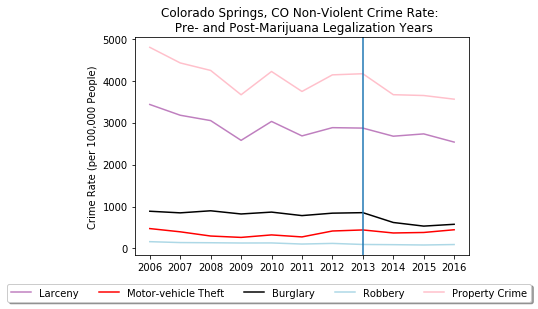

In [10]:
# Create stacked line graphs where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COlarceny.index
# each bar is a line here
p1 = plt.plot(CO_x_axis, COlarceny["value"], color='purple', alpha=0.5)
p2 = plt.plot(CO_x_axis, COmotor["value"].values, color='red')
p3 = plt.plot(CO_x_axis, COburglary["value"].values, color='black')
p4 = plt.plot(CO_x_axis, COrobbery["value"].values, color="#ADD8E6")
p5 = plt.plot(CO_x_axis, COpropCrime["value"].values, color='pink')

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
plt.axvline(x=2013)
COcrimeRatesNVComparison

In [11]:
# file_to_load3 = os.path.join("Output CSVs", "Fortworth.csv")

# TXcrimeDF = pd.read_csv(file_to_load3)

# TXcrimeRates = TXcrimeDF.loc[TXcrimeDF["variable"] == "rate"]

# TXcrimeRatesViolent = TXcrimeRates.loc[TXcrimeRates["crime_type"] == "Violent crime"]
# TXcrimeRatesViolent = TXcrimeRatesViolent.drop_duplicates()
# TXcrimeRatesViolentYears = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["year"].isin(years)]
# TXcrimeRatesViolentYears

,name,type,variable,value,year,crime_type
137,"Riverside, California",place,rate,688.081230,2006,Violent crime
34,"Riverside, California",place,rate,632.450420,2007,Violent crime
109,"Riverside, California",place,rate,641.984876,2008,Violent crime
122,"Riverside, California",place,rate,511.886778,2009,Violent crime
125,"Riverside, California",place,rate,479.694162,2010,Violent crime
54,"Riverside, California",place,rate,426.095244,2011,Violent crime
25,"Riverside, California",place,rate,443.016981,2012,Violent crime
43,"Riverside, California",place,rate,420.323428,2013,Violent crime
110,"Riverside, California",place,rate,433.240571,2014,Violent crime
258,"Riverside, California",place,rate,446.041651,2015,Violent crime


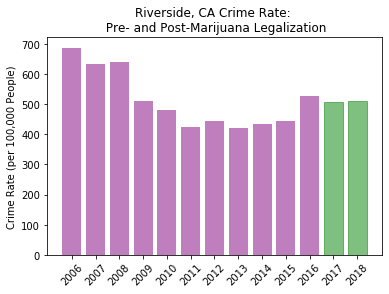

In [12]:
# basic CA graphs from an earlier stage of analysis

file_to_load4 = os.path.join("Output CSVs", "Riverside.csv")

CAcrimeDF = pd.read_csv(file_to_load4)

CAcrimeRates = CAcrimeDF.loc[CAcrimeDF["variable"] == "rate"]

CAcrimeRatesViolent = CAcrimeRates.loc[CAcrimeRates["crime_type"] == "Violent crime"]
CAcrimeRatesViolent = CAcrimeRatesViolent.drop_duplicates()
CAcrimeRatesViolentYears = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimeRatesViolentYears

#CA_prepost_legalization = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

CAcrimePostLegalization = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimePostLegalization = CAcrimePostLegalization.drop(columns=["key", "id", "place_name"])
CAcrimePostLegalization = CAcrimePostLegalization.sort_values(['year'], ascending=[True])
CAcrimePostLegalization

CA_x_axis = np.arange(len(CAcrimePostLegalization["value"]))
postLegalCA = plt.bar(CA_x_axis, CAcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCA[11].set_color('g')
postLegalCA[12].set_color('g')

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Riverside, CA Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
CAcrimePostLegalization

,name,type,variable,value,year,crime_type
94,"Riverside, California",place,rate,28.356873,2006,Forcible rape
57,"Riverside, California",place,rate,377.863873,2006,Aggravated assault
130,"Riverside, California",place,rate,3.758140,2006,Murder and nonnegligent manslaughter
108,"Riverside, California",place,rate,4.009194,2007,Murder and nonnegligent manslaughter
2,"Riverside, California",place,rate,30.403058,2007,Forcible rape
153,"Riverside, California",place,rate,368.845887,2007,Aggravated assault
79,"Riverside, California",place,rate,356.732491,2008,Aggravated assault
39,"Riverside, California",place,rate,36.408091,2008,Forcible rape
163,"Riverside, California",place,rate,6.346365,2008,Murder and nonnegligent manslaughter
167,"Riverside, California",place,rate,5.002151,2009,Murder and nonnegligent manslaughter


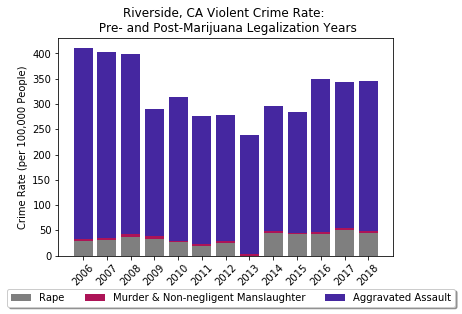

In [13]:
# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
CAcrimeRatesYears = CAcrimeRates.loc[CAcrimeRates["year"].isin(years)]
CAcrimeRatesYears = CAcrimeRatesYears.drop_duplicates()
# remove extraneous columns
CAcrimeRatesYears = CAcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
CAcrimeRatesYears = CAcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", 'Rape (legacy definition)']
CAcrimeRatesViolent = CAcrimeRatesYears.loc[CAcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
CArape = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
CArape = CArape.set_index(["year"])

CAmurder = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
CAmurder = CAmurder.set_index(["year"])

CAassault = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"] == "Aggravated assault"]
CAassault = CAassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CArape.index
# each bar is a line here
p1 = plt.bar(CA_x_axis, CArape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(CA_x_axis, CAmurder["value"].values, color='#AD1457', bottom=CArape["value"].values)
p3 = plt.bar(CA_x_axis, CAassault["value"].values, color='#4527A0', bottom=(CAmurder["value"] + CArape["value"]).values)

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Riverside, CA Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
CAcrimeRatesViolent

,name,type,variable,value,year,crime_type
94,"Riverside, California",place,rate,28.356873,2006,Forcible rape
57,"Riverside, California",place,rate,377.863873,2006,Aggravated assault
130,"Riverside, California",place,rate,3.758140,2006,Murder and nonnegligent manslaughter
108,"Riverside, California",place,rate,4.009194,2007,Murder and nonnegligent manslaughter
2,"Riverside, California",place,rate,30.403058,2007,Forcible rape
153,"Riverside, California",place,rate,368.845887,2007,Aggravated assault
79,"Riverside, California",place,rate,356.732491,2008,Aggravated assault
39,"Riverside, California",place,rate,36.408091,2008,Forcible rape
163,"Riverside, California",place,rate,6.346365,2008,Murder and nonnegligent manslaughter
167,"Riverside, California",place,rate,5.002151,2009,Murder and nonnegligent manslaughter


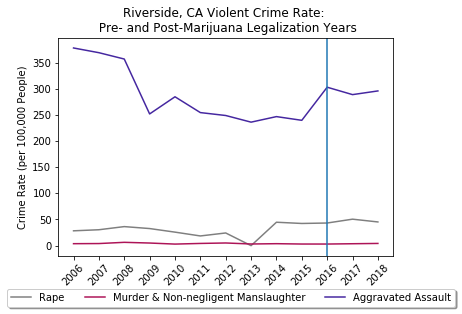

In [14]:
# Create stacked line graphs where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CArape.index
# each bar is a line here
p1 = plt.plot(CA_x_axis, CArape["value"], color='black', alpha=0.5)
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.plot(CA_x_axis, CAmurder["value"].values, color='#AD1457')
p3 = plt.plot(CA_x_axis, CAassault["value"].values, color='#4527A0')

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Riverside, CA Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
plt.axvline(x=2016)
CAcrimeRatesViolent

,name,type,variable,value,year,crime_type
159,"Riverside, California",place,rate,4191.009163,2006,Property crime
106,"Riverside, California",place,rate,828.157350,2006,Motor vehicle theft
6,"Riverside, California",place,rate,810.391598,2006,Burglary
9,"Riverside, California",place,rate,278.102344,2006,Robbery
103,"Riverside, California",place,rate,2552.460215,2006,Larceny
...,...,...,...,...,...,...
303,"Riverside, California",place,rate,444.079245,2018,Burglary
293,"Riverside, California",place,rate,557.364767,2018,Motor vehicle theft
297,"Riverside, California",place,rate,164.037436,2018,Robbery
299,"Riverside, California",place,rate,2087.776643,2018,Larceny


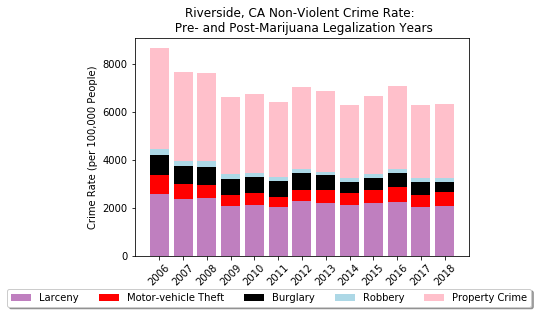

In [15]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
CAcrimeRatesNonViolent = CAcrimeRates.loc[CAcrimeRates["crime_type"].isin(nonVcrime)]
CAcrimeRatesNonViolent = CAcrimeRatesNonViolent.drop_duplicates()
CAcrimeRatesNonViolentYears = CAcrimeRatesNonViolent.loc[CAcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
CAcrimeRatesNVComparison = CAcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
CAcrimeRatesNVComparison = CAcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
CAlarceny = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
CAlarceny = CAlarceny.set_index(["year"])

CAmotor = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
CAmotor = CAmotor.set_index(["year"])

CAburglary = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Burglary"]
CAburglary = CAburglary.set_index(["year"])

CArobbery = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Robbery"]
CArobbery = CArobbery.set_index(["year"])

CApropCrime = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Property crime"]
CApropCrime = CApropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CAlarceny.index
# each bar is a line here
p1 = plt.bar(CA_x_axis, CAlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(CA_x_axis, CAmotor["value"].values, color='red', bottom=CAlarceny["value"].values)
p3 = plt.bar(CA_x_axis, CAburglary["value"].values, color='black', bottom=(CAmotor["value"] + CAlarceny["value"]).values)
p4 = plt.bar(CA_x_axis, CArobbery["value"].values, color="#ADD8E6", bottom = (CAmotor["value"] + CAlarceny["value"] + CAburglary["value"]).values)
p5 = plt.bar(CA_x_axis, CApropCrime["value"].values, color='pink', bottom = (CAmotor["value"] + CAlarceny["value"] + CAburglary["value"] + CArobbery["value"]).values)

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Riverside, CA Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
CAcrimeRatesNVComparison

,name,type,variable,value,year,crime_type
159,"Riverside, California",place,rate,4191.009163,2006,Property crime
106,"Riverside, California",place,rate,828.157350,2006,Motor vehicle theft
6,"Riverside, California",place,rate,810.391598,2006,Burglary
9,"Riverside, California",place,rate,278.102344,2006,Robbery
103,"Riverside, California",place,rate,2552.460215,2006,Larceny
...,...,...,...,...,...,...
303,"Riverside, California",place,rate,444.079245,2018,Burglary
293,"Riverside, California",place,rate,557.364767,2018,Motor vehicle theft
297,"Riverside, California",place,rate,164.037436,2018,Robbery
299,"Riverside, California",place,rate,2087.776643,2018,Larceny


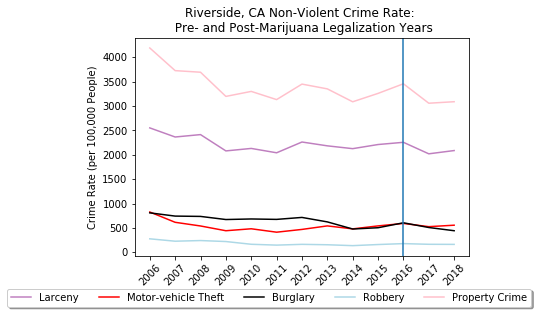

In [16]:
# Create stacked line graphs where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CAlarceny.index
# each bar is a line here
p1 = plt.plot(CA_x_axis, CAlarceny["value"], color='purple', alpha=0.5)
p2 = plt.plot(CA_x_axis, CAmotor["value"].values, color='red')
p3 = plt.plot(CA_x_axis, CAburglary["value"].values, color='black')
p4 = plt.plot(CA_x_axis, CArobbery["value"].values, color="#ADD8E6")
p5 = plt.plot(CA_x_axis, CApropCrime["value"].values, color='pink')

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Riverside, CA Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
plt.axvline(x=2016)
CAcrimeRatesNVComparison

,name,type,variable,value,year,crime_type
61,"Fort Worth, Texas",place,rate,388.935290,2006,Aggravated assault
166,"Fort Worth, Texas",place,rate,38.488388,2006,Forcible rape
56,"Fort Worth, Texas",place,rate,7.635348,2006,Murder and nonnegligent manslaughter
102,"Fort Worth, Texas",place,rate,366.933903,2007,Aggravated assault
11,"Fort Worth, Texas",place,rate,49.948337,2007,Forcible rape
137,"Fort Worth, Texas",place,rate,8.647772,2007,Murder and nonnegligent manslaughter
72,"Fort Worth, Texas",place,rate,6.986576,2008,Murder and nonnegligent manslaughter
4,"Fort Worth, Texas",place,rate,49.904113,2008,Forcible rape
159,"Fort Worth, Texas",place,rate,355.887616,2008,Aggravated assault
138,"Fort Worth, Texas",place,rate,6.081918,2009,Murder and nonnegligent manslaughter


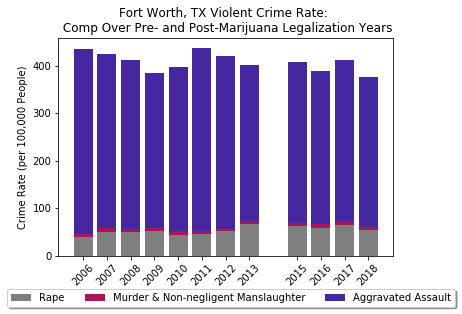

In [17]:
# TX HAS NO 2014 DATA!
file_to_load3 = os.path.join("Output CSVs", "Fortworth.csv")
TXyears = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018]

# load your city's CSV in a dataframe
TXcrimeDF = pd.read_csv(file_to_load3)

# filter whole NY dataset to just showing rates, not counts:
TXcrimeRates = TXcrimeDF.loc[TXcrimeDF["variable"] == "rate"]

# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
TXcrimeRatesYears = TXcrimeRates.loc[TXcrimeRates["year"].isin(TXyears)]
TXcrimeRatesYears = TXcrimeRatesYears.drop_duplicates()
# remove extraneous columns
TXcrimeRatesYears = TXcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
TXcrimeRatesYears = TXcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)"]
TXcrimeRatesViolent = TXcrimeRatesYears.loc[TXcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
TXrape = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
TXrape = TXrape.set_index(["year"])

TXmurder = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
TXmurder = TXmurder.set_index(["year"])

TXassault = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["crime_type"] == "Aggravated assault"]
TXassault = TXassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
TX_x_axis = TXrape.index
# each bar is a line here
p1 = plt.bar(TX_x_axis, TXrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(TX_x_axis, TXmurder["value"].values, color='#AD1457', bottom=TXrape["value"].values)
p3 = plt.bar(TX_x_axis, TXassault["value"].values, color='#4527A0', bottom=(TXmurder["value"] + TXrape["value"]).values)

tick_locations = [value for value in TX_x_axis]
plt.xticks(tick_locations, TXyears, rotation=45)
plt.title("Fort Worth, TX Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
TXcrimeRatesViolent

,name,type,variable,value,year,crime_type
15,"Fort Worth, Texas",place,rate,3759.707800,2006,Larceny
150,"Fort Worth, Texas",place,rate,220.801805,2006,Robbery
29,"Fort Worth, Texas",place,rate,1402.099253,2006,Burglary
48,"Fort Worth, Texas",place,rate,5683.348085,2006,Property crime
53,"Fort Worth, Texas",place,rate,521.541031,2006,Motor vehicle theft
168,"Fort Worth, Texas",place,rate,5469.119254,2007,Property crime
97,"Fort Worth, Texas",place,rate,241.541212,2007,Robbery
164,"Fort Worth, Texas",place,rate,3725.698643,2007,Larceny
100,"Fort Worth, Texas",place,rate,400.332194,2007,Motor vehicle theft
107,"Fort Worth, Texas",place,rate,1343.088418,2007,Burglary


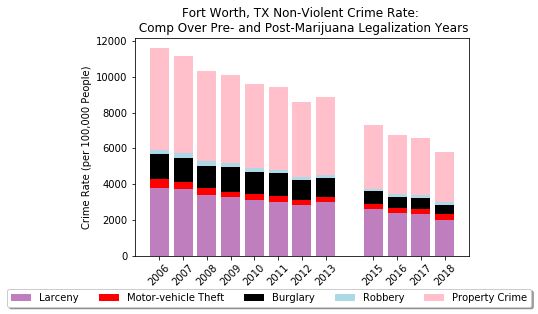

In [23]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
TXcrimeRatesNonViolent = TXcrimeRates.loc[TXcrimeRates["crime_type"].isin(nonVcrime)]
TXcrimeRatesNonViolent = TXcrimeRatesNonViolent.drop_duplicates()
TXcrimeRatesNonViolentYears = TXcrimeRatesNonViolent.loc[TXcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
TXcrimeRatesNVComparison = TXcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
TXcrimeRatesNVComparison = TXcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
TXlarceny = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
TXlarceny = TXlarceny.set_index(["year"])

TXmotor = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
TXmotor = TXmotor.set_index(["year"])

TXburglary = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Burglary"]
TXburglary = TXburglary.set_index(["year"])

TXrobbery = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Robbery"]
TXrobbery = TXrobbery.set_index(["year"])

TXpropCrime = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison["crime_type"] == "Property crime"]
TXpropCrime = TXpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
TX_x_axis = TXlarceny.index
# each bar is a line here
p1 = plt.bar(TX_x_axis, TXlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(TX_x_axis, TXmotor["value"].values, color='red', bottom=TXlarceny["value"].values)
p3 = plt.bar(TX_x_axis, TXburglary["value"].values, color='black', bottom=(TXmotor["value"] + TXlarceny["value"]).values)
p4 = plt.bar(TX_x_axis, TXrobbery["value"].values, color="#ADD8E6", bottom = (TXmotor["value"] + TXlarceny["value"] + TXburglary["value"]).values)
p5 = plt.bar(TX_x_axis, TXpropCrime["value"].values, color='pink', bottom = (TXmotor["value"] + TXlarceny["value"] + TXburglary["value"] + TXrobbery["value"]).values)

tick_locations = [value for value in TX_x_axis]
plt.xticks(tick_locations, TXyears, rotation=45)
plt.title("Fort Worth, TX Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
TXcrimeRatesNVComparison

,name,type,variable,value,year,crime_type
0,"Portland, Oregon",place,rate,3.688853,2006,Murder and nonnegligent manslaughter
1,"Portland, Oregon",place,rate,54.041691,2006,Forcible rape
4,"Portland, Oregon",place,rate,417.209235,2006,Aggravated assault
27,"Portland, Oregon",place,rate,392.096378,2007,Aggravated assault
24,"Portland, Oregon",place,rate,52.031747,2007,Forcible rape
11,"Portland, Oregon",place,rate,4.088209,2007,Murder and nonnegligent manslaughter
38,"Portland, Oregon",place,rate,368.339111,2008,Aggravated assault
35,"Portland, Oregon",place,rate,45.206076,2008,Forcible rape
34,"Portland, Oregon",place,rate,4.701432,2008,Murder and nonnegligent manslaughter
46,"Portland, Oregon",place,rate,44.927154,2009,Forcible rape


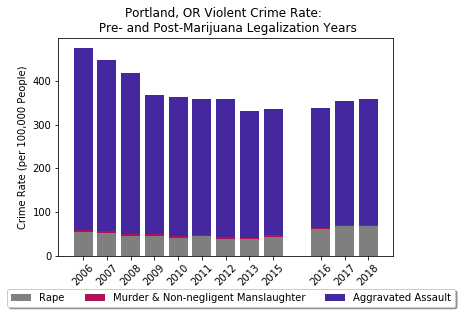

In [26]:
file_to_load6 = os.path.join("Output CSVs", "Portland.csv")

# load your city's CSV in a dataframe
PDXcrimeDF = pd.read_csv(file_to_load6)

# filter whole NY dataset to just showing rates, not counts:
PDXcrimeRates = PDXcrimeDF.loc[PDXcrimeDF["variable"] == "rate"]
PDXcrimeRatesYears = PDXcrimeRates.loc[PDXcrimeRates["year"].isin(years)]
PDXcrimeRatesYears = PDXcrimeRatesYears.drop_duplicates()
# remove extraneous columns
PDXcrimeRatesYears = PDXcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
PDXcrimeRatesYears =PDXcrimeRatesYears.sort_values(['year'], ascending=[True])

PDXyears = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018]

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", "Rape (legacy definition)"]
PDXcrimeRatesViolent = PDXcrimeRatesYears.loc[PDXcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)", "Rape (legacy definition)"]
PDXrape = PDXcrimeRatesViolent.loc[PDXcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
PDXrape = PDXrape.set_index(["year"])

PDXmurder = PDXcrimeRatesViolent.loc[PDXcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
PDXmurder = PDXmurder.set_index(["year"])

PDXassault = PDXcrimeRatesViolent.loc[PDXcrimeRatesViolent["crime_type"] == "Aggravated assault"]
PDXassault = PDXassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
PDX_x_axis = PDXrape.index
# each bar is a line here
p1 = plt.bar(PDX_x_axis, PDXrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(PDX_x_axis, PDXmurder["value"].values, color='#AD1457', bottom=PDXrape["value"].values)
p3 = plt.bar(PDX_x_axis, PDXassault["value"].values, color='#4527A0', bottom=(PDXmurder["value"] + PDXrape["value"]).values)

tick_locations = [value for value in PDX_x_axis]
plt.xticks(tick_locations, PDXyears, rotation=45)
plt.title("Portland, OR Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
PDXcrimeRatesViolent

,name,type,variable,value,year,crime_type
3,"Portland, Oregon",place,rate,239.222095,2006,Robbery
6,"Portland, Oregon",place,rate,825.934110,2006,Motor vehicle theft
7,"Portland, Oregon",place,rate,1011.667841,2006,Burglary
8,"Portland, Oregon",place,rate,4063.824529,2006,Larceny
9,"Portland, Oregon",place,rate,5901.426479,2006,Property crime
26,"Portland, Oregon",place,rate,239.531863,2007,Robbery
29,"Portland, Oregon",place,rate,886.026317,2007,Motor vehicle theft
30,"Portland, Oregon",place,rate,899.405909,2007,Burglary
31,"Portland, Oregon",place,rate,4084.120468,2007,Larceny
32,"Portland, Oregon",place,rate,5869.552694,2007,Property crime


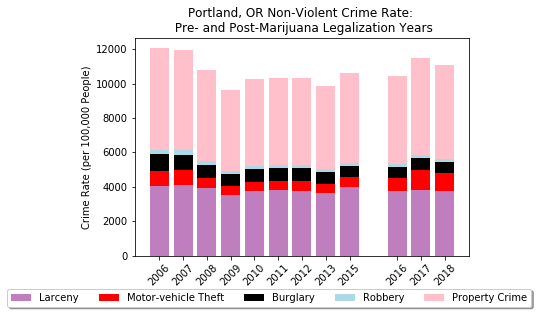

In [27]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
PDXcrimeRatesNonViolent = PDXcrimeRates.loc[PDXcrimeRates["crime_type"].isin(nonVcrime)]
PDXcrimeRatesNonViolent = PDXcrimeRatesNonViolent.drop_duplicates()
PDXcrimeRatesNonViolentYears = PDXcrimeRatesNonViolent.loc[PDXcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
PDXcrimeRatesNVComparison = PDXcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
PDXcrimeRatesNVComparison = PDXcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
PDXlarceny = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
PDXlarceny = PDXlarceny.set_index(["year"])

PDXmotor = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
PDXmotor = PDXmotor.set_index(["year"])

PDXburglary = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison["crime_type"] == "Burglary"]
PDXburglary = PDXburglary.set_index(["year"])

PDXrobbery = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison["crime_type"] == "Robbery"]
PDXrobbery = PDXrobbery.set_index(["year"])

PDXpropCrime = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison["crime_type"] == "Property crime"]
PDXpropCrime = PDXpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
PDX_x_axis = PDXlarceny.index
# each bar is a line here
p1 = plt.bar(PDX_x_axis, PDXlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(PDX_x_axis, PDXmotor["value"].values, color='red', bottom=PDXlarceny["value"].values)
p3 = plt.bar(PDX_x_axis, PDXburglary["value"].values, color='black', bottom=(PDXmotor["value"] + PDXlarceny["value"]).values)
p4 = plt.bar(PDX_x_axis, PDXrobbery["value"].values, color="#ADD8E6", bottom = (PDXmotor["value"] + PDXlarceny["value"] + PDXburglary["value"]).values)
p5 = plt.bar(PDX_x_axis, PDXpropCrime["value"].values, color='pink', bottom = (PDXmotor["value"] + PDXlarceny["value"] + PDXburglary["value"] + PDXrobbery["value"]).values)

tick_locations = [value for value in PDX_x_axis]
plt.xticks(tick_locations, PDXyears, rotation=45)
plt.title("Portland, OR Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
PDXcrimeRatesNVComparison

,name,type,variable,value,year,crime_type
10,"Norfolk, Virginia",place,rate,11.952225,2006,Murder and nonnegligent manslaughter
50,"Norfolk, Virginia",place,rate,42.686519,2006,Forcible rape
104,"Norfolk, Virginia",place,rate,327.832464,2006,Aggravated assault
110,"Norfolk, Virginia",place,rate,381.302572,2007,Aggravated assault
49,"Norfolk, Virginia",place,rate,42.561967,2007,Forcible rape
24,"Norfolk, Virginia",place,rate,21.061592,2007,Murder and nonnegligent manslaughter
45,"Norfolk, Virginia",place,rate,36.585314,2008,Forcible rape
106,"Norfolk, Virginia",place,rate,334.798164,2008,Aggravated assault
9,"Norfolk, Virginia",place,rate,11.911498,2008,Murder and nonnegligent manslaughter
105,"Norfolk, Virginia",place,rate,330.076522,2009,Aggravated assault


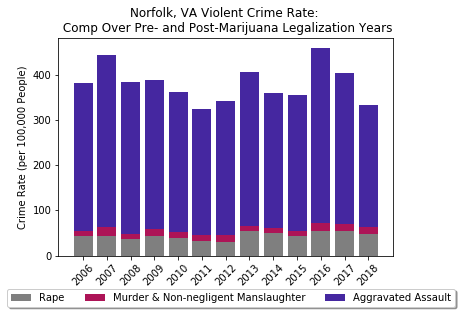

In [28]:
file_to_load7 = os.path.join("Output CSVs", "Norfolk.csv")

# load your city's CSV in a dataframe
VAcrimeDF = pd.read_csv(file_to_load7)

# filter whole NY dataset to just showing rates, not counts:
VAcrimeRates = VAcrimeDF.loc[VAcrimeDF["variable"] == "rate"]
VAcrimeRatesYears = VAcrimeRates.loc[VAcrimeRates["year"].isin(years)]
VAcrimeRatesYears = VAcrimeRatesYears.drop_duplicates()
# remove extraneous columns
VAcrimeRatesYears = VAcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
VAcrimeRatesYears =VAcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", "Rape (legacy definition)"]
VAcrimeRatesViolent = VAcrimeRatesYears.loc[VAcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)", "Rape (legacy definition)"]
VArape = VAcrimeRatesViolent.loc[VAcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
VArape = VArape.set_index(["year"])

VAmurder = VAcrimeRatesViolent.loc[VAcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
VAmurder = VAmurder.set_index(["year"])

VAassault = VAcrimeRatesViolent.loc[VAcrimeRatesViolent["crime_type"] == "Aggravated assault"]
VAassault = VAassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
VA_x_axis = VArape.index
# each bar is a line here
p1 = plt.bar(VA_x_axis, VArape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(VA_x_axis, VAmurder["value"].values, color='#AD1457', bottom=VArape["value"].values)
p3 = plt.bar(VA_x_axis, VAassault["value"].values, color='#4527A0', bottom=(VAmurder["value"] + VArape["value"]).values)

tick_locations = [value for value in VA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Norfolk, VA Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
VAcrimeRatesViolent

,name,type,variable,value,year,crime_type
117,"Norfolk, Virginia",place,rate,404.668198,2006,Robbery
219,"Norfolk, Virginia",place,rate,3855.446373,2006,Larceny
146,"Norfolk, Virginia",place,rate,688.960412,2006,Burglary
119,"Norfolk, Virginia",place,rate,442.659199,2006,Motor vehicle theft
228,"Norfolk, Virginia",place,rate,4987.065985,2006,Property crime
...,...,...,...,...,...,...
215,"Norfolk, Virginia",place,rate,3463.517047,2018,Property crime
103,"Norfolk, Virginia",place,rate,322.492193,2018,Motor vehicle theft
208,"Norfolk, Virginia",place,rate,2853.319255,2018,Larceny
93,"Norfolk, Virginia",place,rate,287.705599,2018,Burglary


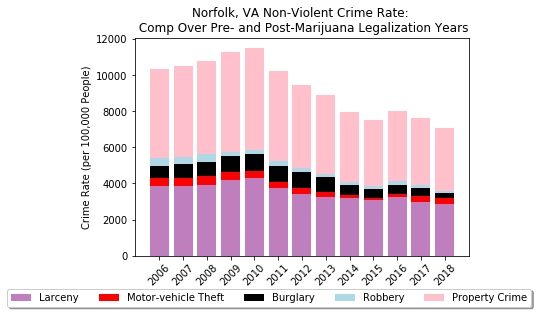

In [30]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
VAcrimeRatesNonViolent = VAcrimeRates.loc[VAcrimeRates["crime_type"].isin(nonVcrime)]
VAcrimeRatesNonViolent = VAcrimeRatesNonViolent.drop_duplicates()
VAcrimeRatesNonViolentYears = VAcrimeRatesNonViolent.loc[VAcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
VAcrimeRatesNVComparison = VAcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
VAcrimeRatesNVComparison = VAcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
VAlarceny = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
VAlarceny = VAlarceny.set_index(["year"])

VAmotor = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
VAmotor = VAmotor.set_index(["year"])

VAburglary = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison["crime_type"] == "Burglary"]
VAburglary = VAburglary.set_index(["year"])

VArobbery = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison["crime_type"] == "Robbery"]
VArobbery = VArobbery.set_index(["year"])

VApropCrime = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison["crime_type"] == "Property crime"]
VApropCrime = VApropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
VA_x_axis = VAlarceny.index
# each bar is a line here
p1 = plt.bar(VA_x_axis, VAlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(VA_x_axis, VAmotor["value"].values, color='red', bottom=VAlarceny["value"].values)
p3 = plt.bar(VA_x_axis, VAburglary["value"].values, color='black', bottom=(VAmotor["value"] + VAlarceny["value"]).values)
p4 = plt.bar(VA_x_axis, VArobbery["value"].values, color="#ADD8E6", bottom = (VAmotor["value"] + VAlarceny["value"] + VAburglary["value"]).values)
p5 = plt.bar(VA_x_axis, VApropCrime["value"].values, color='pink', bottom = (VAmotor["value"] + VAlarceny["value"] + VAburglary["value"] + VArobbery["value"]).values)

tick_locations = [value for value in VA_x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.title("Norfolk, VA Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.13),
          fancybox=True, shadow=True, ncol=5)
VAcrimeRatesNVComparison

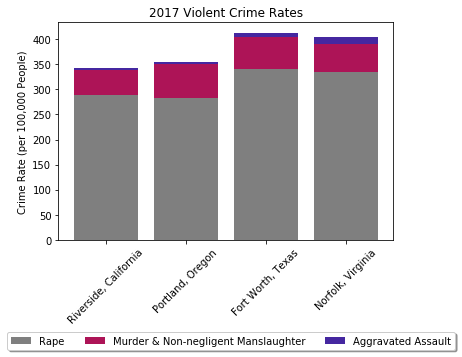

In [54]:
# filter whole NY dataset to just showing rates, not counts:
VAcrimeRates = VAcrimeDF.loc[VAcrimeDF["variable"] == "rate"]
VAcrimeRatesYears = VAcrimeRates.loc[VAcrimeRates["year"].isin(years)]
VAcrimeRatesYears = VAcrimeRatesYears.drop_duplicates()
# remove extraneous columns
VAcrimeRatesYears = VAcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
VAcrimeRatesYears =VAcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", "Rape (legacy definition)"]
VAcrimeRatesViolent= VAcrimeRatesYears.loc[VAcrimeRatesYears["crime_type"].isin(Vcrime)]

CAcrimeRatesViolent2017 = CAcrimeRatesViolent.loc[CAcrimeRatesViolent['year'] == 2017]
PDXcrimeRatesViolent2017 = PDXcrimeRatesViolent.loc[PDXcrimeRatesViolent['year'] == 2017]
VAcrimeRatesViolent2017 = VAcrimeRatesViolent.loc[VAcrimeRatesViolent['year'] == 2017]
TXcrimeRatesViolent2017 = TXcrimeRatesViolent.loc[TXcrimeRatesViolent['year'] == 2017]
#NYcrimeRatesViolent2017
#COcrimeRatesViolent2017

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)", "Rape (legacy definition)"]
VArape2017 = VAcrimeRatesViolent2017.loc[VAcrimeRatesViolent2017["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
VArape2017 = VArape2017.set_index(["name"])

PDXrape2017 = PDXcrimeRatesViolent2017.loc[PDXcrimeRatesViolent2017["crime_type"].isin(rapeCategories)]
PDXrape2017 = PDXrape2017.set_index(["name"])

CArape2017 = CAcrimeRatesViolent2017.loc[CAcrimeRatesViolent2017["crime_type"].isin(rapeCategories)]
CArape2017 = CArape2017.set_index(["name"])

TXrape2017 = TXcrimeRatesViolent2017.loc[TXcrimeRatesViolent2017["crime_type"].isin(rapeCategories)]
TXrape2017 = TXrape2017.set_index(["name"])

VAmurder2017 = VAcrimeRatesViolent2017.loc[VAcrimeRatesViolent2017["crime_type"] == "Murder and nonnegligent manslaughter"]
VAmurder2017 = VAmurder2017.set_index(["name"])

PDXmurder2017 = PDXcrimeRatesViolent2017.loc[PDXcrimeRatesViolent2017["crime_type"] == "Murder and nonnegligent manslaughter"]
PDXmurder2017 = PDXmurder2017.set_index(["name"])

TXmurder2017 = TXcrimeRatesViolent2017.loc[TXcrimeRatesViolent2017["crime_type"] == "Murder and nonnegligent manslaughter"]
TXmurder2017 = TXmurder2017.set_index(["name"])

CAmurder2017 = CAcrimeRatesViolent2017.loc[CAcrimeRatesViolent2017["crime_type"] == "Murder and nonnegligent manslaughter"]
CAmurder2017 = CAmurder2017.set_index(["name"])

VAassault2017 = VAcrimeRatesViolent2017.loc[VAcrimeRatesViolent2017["crime_type"] == "Aggravated assault"]
VAassault2017 = VAassault2017.set_index(["name"])

PDXassault2017 = PDXcrimeRatesViolent2017.loc[PDXcrimeRatesViolent2017["crime_type"] == "Aggravated assault"]
PDXassault2017 = PDXassault2017.set_index(["name"])

TXassault2017 = TXcrimeRatesViolent2017.loc[TXcrimeRatesViolent2017["crime_type"] == "Aggravated assault"]
TXassault2017 = TXassault2017.set_index(["name"])

CAassault2017 = CAcrimeRatesViolent2017.loc[CAcrimeRatesViolent2017["crime_type"] == "Aggravated assault"]
CAassault2017 = CAassault2017.set_index(["name"])
TXassault2017

aggregatedAssaultDF = CAassault2017
aggregatedAssaultDF = aggregatedAssaultDF.append(PDXassault2017)
aggregatedAssaultDF = aggregatedAssaultDF.append(TXassault2017)
aggregatedAssaultDF = aggregatedAssaultDF.append(VAassault2017)

aggregatedRapeDF = CArape2017
aggregatedRapeDF = aggregatedRapeDF.append(PDXrape2017)
aggregatedRapeDF = aggregatedRapeDF.append(TXrape2017)
aggregatedRapeDF = aggregatedRapeDF.append(VArape2017)

aggregatedMurderDF = CAmurder2017
aggregatedMurderDF = aggregatedMurderDF.append(PDXmurder2017)
aggregatedMurderDF = aggregatedMurderDF.append(TXmurder2017)
aggregatedMurderDF = aggregatedMurderDF.append(VAmurder2017)

aggregatedMurderDF

# # Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
cities = aggregatedAssaultDF.index
# each bar is a line here
p1 = plt.bar(cities, aggregatedAssaultDF["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(cities, aggregatedRapeDF["value"].values, color='#AD1457', bottom=aggregatedAssaultDF["value"].values)
p3 = plt.bar(cities, aggregatedMurderDF["value"].values, color='#4527A0', bottom=(aggregatedRapeDF["value"] + aggregatedAssaultDF["value"]).values)

tick_locations = [value for value in cities]
plt.xticks(tick_locations, cities, rotation=45)
plt.title("2017 Violent Crime Rates")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.4),
          fancybox=True, shadow=True, ncol=5)


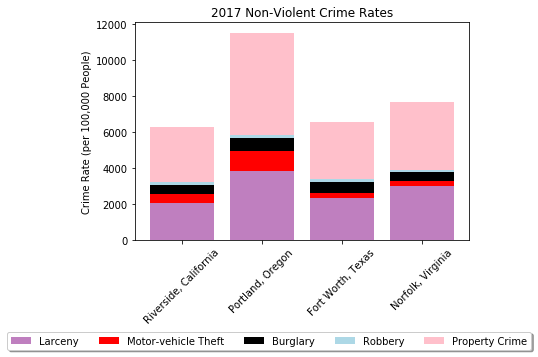

In [59]:
# create a list with the text of each violent-crime category and filter data again
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

CAcrimeRatesNVComparison2017 = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison['year'] == 2017]
PDXcrimeRatesNVComparison2017 = PDXcrimeRatesNVComparison.loc[PDXcrimeRatesNVComparison['year'] == 2017]
VAcrimeRatesNVComparison2017 = VAcrimeRatesNVComparison.loc[VAcrimeRatesNVComparison['year'] == 2017]
TXcrimeRatesNVComparison2017 = TXcrimeRatesNVComparison.loc[TXcrimeRatesNVComparison['year'] == 2017]
#NYcrimeRatesViolent2017
#COcrimeRatesViolent2017

# Create seperate dataframes for each type of crime:

VAlarceny2017 = VAcrimeRatesNVComparison2017.loc[VAcrimeRatesNVComparison2017["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
VAlarceny2017 = VAlarceny2017.set_index(["name"])

CAlarceny2017 = CAcrimeRatesNVComparison2017.loc[CAcrimeRatesNVComparison2017["crime_type"] == "Larceny"]
CAlarceny2017 = CAlarceny2017.set_index(["name"])

PDXlarceny2017 = PDXcrimeRatesNVComparison2017.loc[PDXcrimeRatesNVComparison2017["crime_type"] == "Larceny"]
PDXlarceny2017 = PDXlarceny2017.set_index(["name"])

TXlarceny2017 = TXcrimeRatesNVComparison2017.loc[TXcrimeRatesNVComparison2017["crime_type"] == "Larceny"]
TXlarceny2017 = TXlarceny2017.set_index(["name"])

VAmotor2017 = VAcrimeRatesNVComparison2017.loc[VAcrimeRatesNVComparison2017["crime_type"] == "Motor vehicle theft"]
VAmotor2017 = VAmotor2017.set_index(["name"])

PDXmotor2017 = PDXcrimeRatesNVComparison2017.loc[PDXcrimeRatesNVComparison2017["crime_type"] == "Motor vehicle theft"]
PDXmotor2017 = PDXmotor2017.set_index(["name"])

CAmotor2017 = CAcrimeRatesNVComparison2017.loc[CAcrimeRatesNVComparison2017["crime_type"] == "Motor vehicle theft"]
CAmotor2017 = CAmotor2017.set_index(["name"])

TXmotor2017 = TXcrimeRatesNVComparison2017.loc[TXcrimeRatesNVComparison2017["crime_type"] == "Motor vehicle theft"]
TXmotor2017 = TXmotor2017.set_index(["name"])

VAburglary2017 = VAcrimeRatesNVComparison2017.loc[VAcrimeRatesNVComparison2017["crime_type"] == "Burglary"]
VAburglary2017 = VAburglary2017.set_index(["name"])

CAburglary2017 = CAcrimeRatesNVComparison2017.loc[CAcrimeRatesNVComparison2017["crime_type"] == "Burglary"]
CAburglary2017 = CAburglary2017.set_index(["name"])

PDXburglary2017 = PDXcrimeRatesNVComparison2017.loc[PDXcrimeRatesNVComparison2017["crime_type"] == "Burglary"]
PDXburglary2017 = PDXburglary2017.set_index(["name"])

TXburglary2017 = TXcrimeRatesNVComparison2017.loc[TXcrimeRatesNVComparison2017["crime_type"] == "Burglary"]
TXburglary2017 = TXburglary2017.set_index(["name"])

VArobbery2017 = VAcrimeRatesNVComparison2017.loc[VAcrimeRatesNVComparison2017["crime_type"] == "Robbery"]
VArobbery2017 = VArobbery2017.set_index(["name"])

CArobbery2017 = CAcrimeRatesNVComparison2017.loc[CAcrimeRatesNVComparison2017["crime_type"] == "Robbery"]
CArobbery2017 = CArobbery2017.set_index(["name"])

TXrobbery2017 = TXcrimeRatesNVComparison2017.loc[TXcrimeRatesNVComparison2017["crime_type"] == "Robbery"]
TXrobbery2017 = TXrobbery2017.set_index(["name"])

PDXrobbery2017 = PDXcrimeRatesNVComparison2017.loc[PDXcrimeRatesNVComparison2017["crime_type"] == "Robbery"]
PDXrobbery2017 = PDXrobbery2017.set_index(["name"])

VApropCrime2017 = VAcrimeRatesNVComparison2017.loc[VAcrimeRatesNVComparison2017["crime_type"] == "Property crime"]
VApropCrime2017 = VApropCrime2017.set_index(["name"])

CApropCrime2017 = CAcrimeRatesNVComparison2017.loc[CAcrimeRatesNVComparison2017["crime_type"] == "Property crime"]
CApropCrime2017 = CApropCrime2017.set_index(["name"])

PDXpropCrime2017 = PDXcrimeRatesNVComparison2017.loc[PDXcrimeRatesNVComparison2017["crime_type"] == "Property crime"]
PDXpropCrime2017 = PDXpropCrime2017.set_index(["name"])

TXpropCrime2017 = TXcrimeRatesNVComparison2017.loc[TXcrimeRatesNVComparison2017["crime_type"] == "Property crime"]
TXpropCrime2017 = TXpropCrime2017.set_index(["name"])


aggregatedlarcenyDF = CAlarceny2017
aggregatedlarcenyDF = aggregatedlarcenyDF.append(PDXlarceny2017)
aggregatedlarcenyDF = aggregatedlarcenyDF.append(TXlarceny2017)
aggregatedlarcenyDF = aggregatedlarcenyDF.append(VAlarceny2017)

aggregatedmotorDF = CAmotor2017
aggregatedmotorDF = aggregatedmotorDF.append(PDXmotor2017)
aggregatedmotorDF = aggregatedmotorDF.append(TXmotor2017)
aggregatedmotorDF = aggregatedmotorDF.append(VAmotor2017)

aggregatedburglaryDF = CAburglary2017
aggregatedburglaryDF = aggregatedburglaryDF.append(PDXburglary2017)
aggregatedburglaryDF = aggregatedburglaryDF.append(TXburglary2017)
aggregatedburglaryDF = aggregatedburglaryDF.append(VAburglary2017)

aggregatedrobberyDF = CArobbery2017
aggregatedrobberyDF = aggregatedrobberyDF.append(PDXrobbery2017)
aggregatedrobberyDF = aggregatedrobberyDF.append(TXrobbery2017)
aggregatedrobberyDF = aggregatedrobberyDF.append(VArobbery2017)

aggregatedpropCrimeDF = CApropCrime2017
aggregatedpropCrimeDF = aggregatedpropCrimeDF.append(PDXpropCrime2017)
aggregatedpropCrimeDF = aggregatedpropCrimeDF.append(TXpropCrime2017)
aggregatedpropCrimeDF = aggregatedpropCrimeDF.append(VApropCrime2017)

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
cities = aggregatedpropCrimeDF.index
# each bar is a line here
p1 = plt.bar(cities, aggregatedlarcenyDF["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(cities, aggregatedmotorDF["value"].values, color='red', bottom=aggregatedlarcenyDF["value"].values)
p3 = plt.bar(cities, aggregatedburglaryDF["value"].values, color='black', bottom=(aggregatedmotorDF["value"] + aggregatedlarcenyDF["value"]).values)
p4 = plt.bar(cities, aggregatedrobberyDF["value"].values, color="#ADD8E6", bottom = (aggregatedmotorDF["value"] + aggregatedlarcenyDF["value"] + aggregatedburglaryDF["value"]).values)
p5 = plt.bar(cities, aggregatedpropCrimeDF["value"].values, color='pink', bottom = (aggregatedmotorDF["value"] + aggregatedlarcenyDF["value"] + aggregatedburglaryDF["value"] + aggregatedrobberyDF["value"]).values)

tick_locations = [value for value in cities]
plt.xticks(tick_locations, cities, rotation=45)
plt.title("2017 Non-Violent Crime Rates")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.4),
          fancybox=True, shadow=True, ncol=5)
